In [87]:
# Import training data
import pandas as pd
train = pd.read_csv(r"C:\Users\eshwa\Downloads\train (1).csv")

# Print few random entries
train.sample(5)

,text_tamil,label
10140,நான் கொஞ்சம் தோற்கடிக்கப்பட்ட உணர்வை ஒதுக்கி வ...,0
10970,நான் காதலர்களைப் பார்த்து பொறாமைப்படுகிறேன் என...,3
5752,அந்த டெட் பேச்சுகளை நான் விரும்புகிறேன்,4
1926,எல்லாவற்றிலும் குறுக்குவெட்டு மற்றும் லென்ஸ்ஃப...,1
7826,இந்த நாட்களில் நான் மிகவும் குறைவாக உணர்கிறேன்...,0


# EDA

In [88]:
# Checking the number of rows and columns
print("The DataFrame has " + str(train.shape[0]) + " samples and " + str(train.shape[1]) + " columns")

The DataFrame has 16000 samples and 2 columns


In [89]:
# Check duplicates
print("Duplicate entries in the dataset: " + str(train.duplicated().sum()))

Duplicate entries in the dataset: 1097


In [90]:
train = train.drop_duplicates()

In [91]:
# Check duplicates
print("Duplicate entries in the dataset: " + str(train.duplicated().sum()))

Duplicate entries in the dataset: 0


In [92]:
# Check null values and data type of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14903 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text_tamil  14903 non-null  object
 1   label       14903 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 349.3+ KB


In [93]:
#Some Libraries
import warnings
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )
train.head()

,text_tamil,label,description
0,இந்த வார இறுதியில் நான் மிகவும் ஏக்கமாக உணர்கி...,0,sadness
1,நான் உண்மையிலேயே நம்பிக்கையுடன் இருக்க ஆரம்பித...,1,joy
2,"என்னால் முடிந்ததைச் சிறப்பாகச் செய்ய வேண்டும்,...",0,sadness
3,நான் எங்களை கார் பாகங்கள் இடத்திற்கு அழைத்துச்...,1,joy
4,பயனுள்ளதாக உணர்ந்ததற்கு நான் நன்றியுள்ளவனாக இர...,1,joy


In [95]:
import plotly.express as px
train['length_of_text'] = [len(i.split(' ')) for i in train['text_tamil']]

fig = px.histogram(train['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text"})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

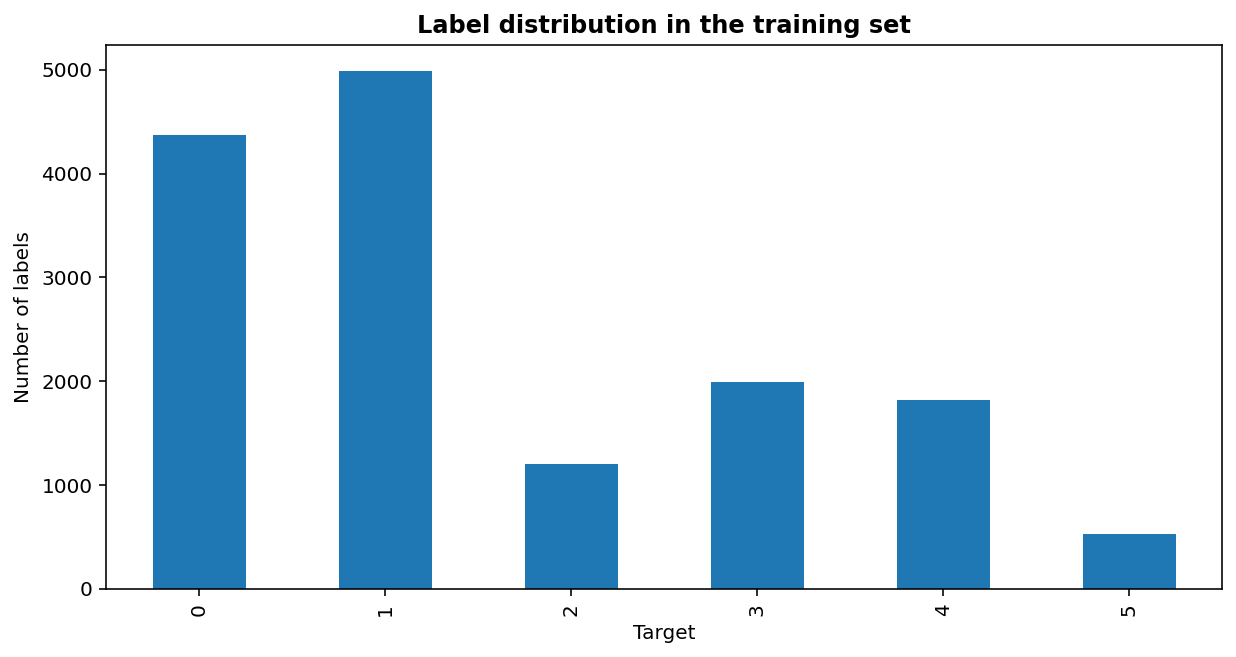

In [96]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
# Check target balance
train['label'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title('Label distribution in the training set', fontweight="bold")
plt.xlabel('Target')
plt.ylabel('Number of labels')
plt.show()

In [97]:
FreqOfWords = train['text_tamil'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Frequency of the Words in the Train Dataset',
                  title_x=0.5, title_font=dict(size=22)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

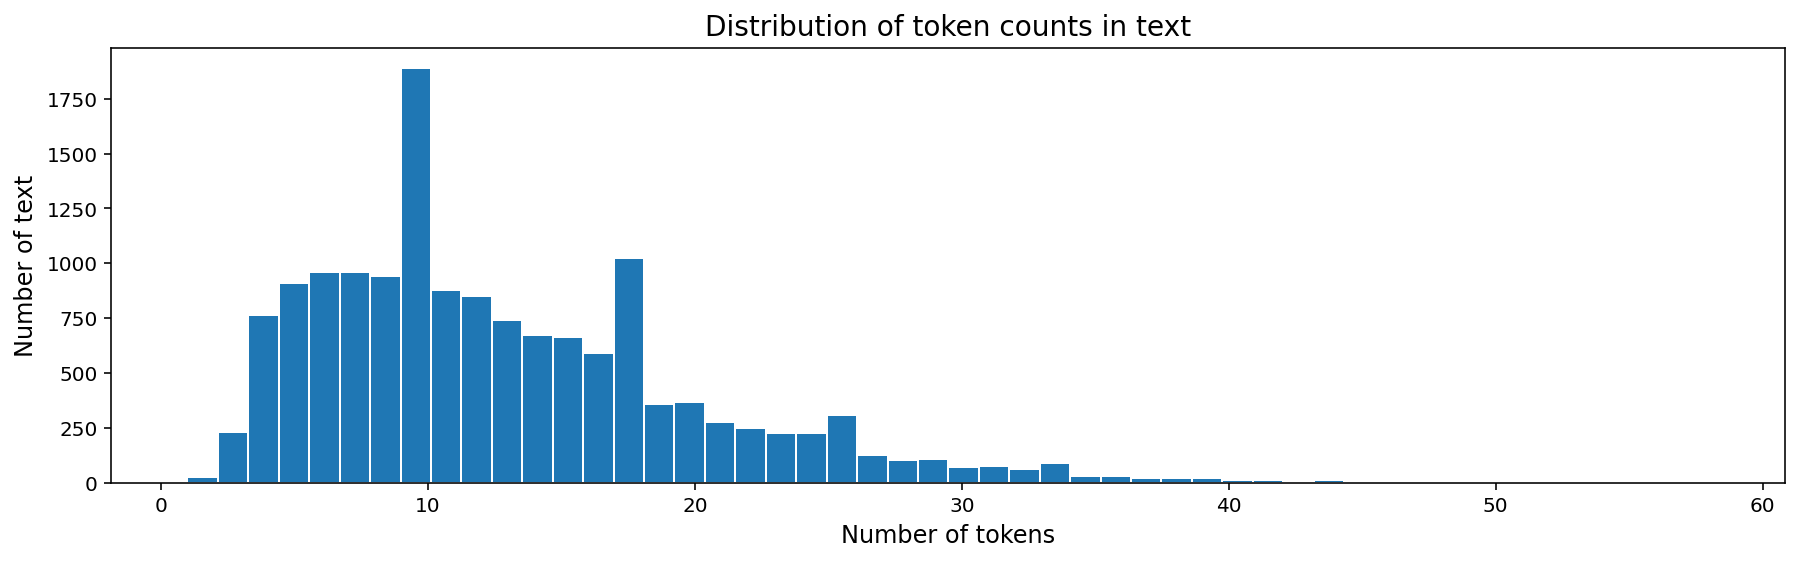

In [98]:
train['clean_text']=train['text_tamil']
plt.figure(figsize=(15,4))
plt.hist(train['clean_text'].apply(lambda x:len(x.split())), bins=50, edgecolor='white')
plt.xlabel('Number of tokens', fontsize=12)
plt.ylabel('Number of text',fontsize=12)
plt.title('Distribution of token counts in text', fontsize=14)
plt.show()

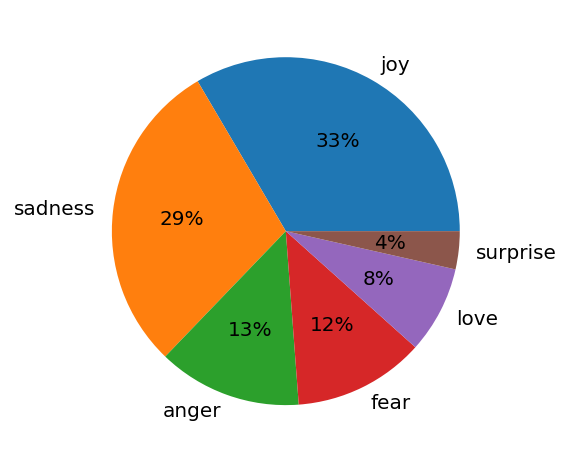

In [99]:
plt.pie(train['label'].value_counts(), labels=train['description'].value_counts().index, autopct='%.0f%%')
plt.show()

In [100]:
# Remove original text column
train = train.drop(columns=['text_tamil'])

# Get few entries to check operation
train.head()

,label,description,length_of_text,clean_text
0,0,sadness,7,இந்த வார இறுதியில் நான் மிகவும் ஏக்கமாக உணர்கி...
1,1,joy,19,நான் உண்மையிலேயே நம்பிக்கையுடன் இருக்க ஆரம்பித...
2,0,sadness,16,"என்னால் முடிந்ததைச் சிறப்பாகச் செய்ய வேண்டும்,..."
3,1,joy,13,நான் எங்களை கார் பாகங்கள் இடத்திற்கு அழைத்துச்...
4,1,joy,5,பயனுள்ளதாக உணர்ந்ததற்கு நான் நன்றியுள்ளவனாக இர...


# Test Set

In [101]:
# Import training data
test = pd.read_csv(r"C:\Users\eshwa\Downloads\correctly_classified_data.csv")

# Print a random row
test.sample(2)

,text_tamil,label
189,ஒவ்வொரு ஞாயிற்றுக்கிழமையும் செவ்வாய் கிழமை இரவ...,1
116,எனது வீட்டு உரிமையாளர் எங்கள் பூட்டுகளை இன்னும...,4


In [102]:
# Preprocess training data adding new column
test["clean_text"] = test["text_tamil"]

# Remove original text column
test = test.drop(columns=['text_tamil'])

# Get few entries to check cleaning operation
test.head(10)

,label,clean_text
0,0,"நான் மிகவும் அழுகியதாக உணர்கிறேன், அதனால் நான்..."
1,0,"நான் என் வலைப்பதிவைப் புதுப்பிக்கிறேன், ஏனென்ற..."
2,1,நான் வந்ததை விட சற்று அதிக நம்பிக்கையுடன் என் ...
3,0,நான் இதை செய்யும்போது கொஞ்சம் வீணாக உணர்ந்தேன்
4,1,வர்ஜீனியா பல்கலைக்கழகத்தில் முதுநிலைப் பட்டயப்...
5,1,அடுத்து என்ன நடக்கும் என்பதைப் பார்க்க ஆர்வமுள...
6,0,ஒரு சிலரே தெரிந்த இந்தப் பெண்கள் என்னையும் என்...
7,1,நான் என்னை மறைக்க கூட தேவையில்லை என்று மக்கள் ...
8,2,நான் ஆதரவாக உணரும் ஒற்றைப்படை நிலையில் இருக்கி...
9,0,நான் உறுதியாக கட்னிஸ் இருந்ததைப் போல நான் மனம்...
